In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

In [7]:
DATA_PATH = ".././data/平成28年度_データ.csv"

In [8]:
df = pd.read_csv(DATA_PATH,encoding="cp932",index_col=[0],usecols=[i for i in range(22) if i != 2])
df.head()

,健康寿命,感染症及び寄生虫,新生物,血液及び造血器の疾患並びに免疫機能の障害,内分泌栄養及び代謝疾患,精神及び行動の障害,神経系の疾患,眼及び付属器の疾患,耳及び乳様突起の疾患,循環器系の疾患,呼吸器系の疾患,消化器系の疾患,皮膚及び皮下組織の疾患,筋骨格系及び結合組織の疾患,腎尿路生殖器系の疾患,妊娠、分娩及び産褥,周産期に発生した病態,先天奇形、変形及び染色体異常,症状、徴候及び異常臨床所見・異常検査所見で他に分類されないもの,損傷、中毒及びその他の外因の影響
全 国,,,,,,,,,,,,,,,,,,,,
北 海 道,72.931877,1.010837,1.275730,1.003346,1.087793,0.986912,1.103158,0.889851,1.068293,1.212906,0.983049,1.184279,1.030605,1.226395,1.120097,1.013677,1.081316,0.875423,1.042811,1.110112
青 森,73.087508,0.904601,1.146268,1.313999,1.086586,0.886471,0.998642,0.844097,0.791463,1.154894,0.985161,0.968224,0.890937,1.087865,1.014347,1.124698,0.759251,0.853694,0.956259,0.936899
岩 手,72.996266,0.859478,1.088169,1.018963,1.059226,1.169853,1.117686,1.006402,0.763415,1.105906,0.854373,0.953172,0.923909,0.956599,0.985306,1.327434,0.971677,1.067117,0.867846,0.867802
宮 城,73.289795,0.854148,1.062394,1.074177,1.130442,0.976471,1.099496,1.070985,1.034756,1.165786,0.974113,1.049336,0.972946,0.982108,1.055768,1.054304,0.950206,0.881700,0.933923,0.906452
秋 田,73.034934,0.858589,1.300949,1.321807,1.163676,1.043676,1.280547,1.055545,0.908537,1.192262,0.992093,1.263092,0.990362,1.252436,0.998264,1.043846,0.804477,0.829068,1.128897,0.943366


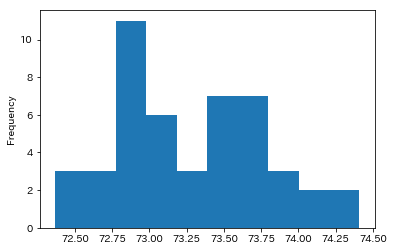

In [9]:
df1 = df.copy()
target  = df1["健康寿命"]
target.describe()
target.plot.hist()

In [25]:
df1 = df.copy()
target  = df1["健康寿命"]
label_func = lambda x : round((x - 72) *  2 -1) 
df1["label"] = target.apply(label_func)
df1["label"].head()

全 国
北 海 道    1
青 森      1
岩 手      1
宮 城      2
秋 田      1
Name: label, dtype: int64

In [26]:
X = df.iloc[:,1:22].values
Y = df1["label"].values
print(X.shape)
print(Y.shape)

(47, 19)
(47,)


In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [28]:
from sklearn.svm import SVC

model = SVC(kernel="linear",random_state=None)
model.fit(X_std,np.round(Y,0))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
#from sklearn.linear_model import RamdomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_std,np.round(Y,0))

/Users/morikawaemi/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import accuracy_score

pred_train = model1.predict(X_std)
accuracy_train = accuracy_score(Y,pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 1.00


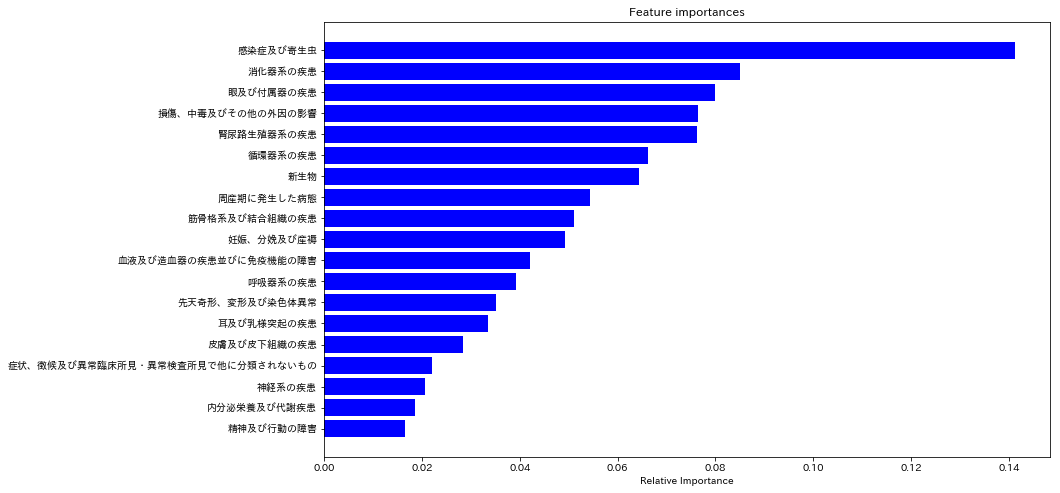

In [31]:
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold import MDS
fig = plt.figure(figsize=(13,8))

importances = model1.feature_importances_
feature = df.columns.to_list()[1:]
indices = np.argsort(importances)

plt.title("Feature importances")
plt.barh(range(len(indices)),importances[indices],color="b",align="center")
plt.yticks(range(len(indices)),[feature[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


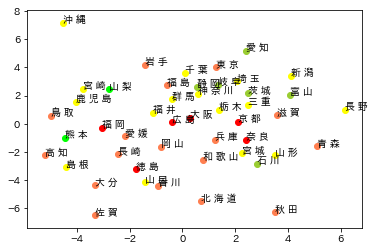

In [33]:
index_col = df1.index.to_list()
color_list = ["red","coral","yellow","yellowgreen","lime"]
embedding = MDS(n_components=2)
X_mds = embedding.fit_transform(X_std)
for i in range(len(X_mds)):
    plt.scatter(X_mds[i,0],X_mds[i,1],color=color_list[pred_train[i]])
    plt.annotate(index_col[i],xy=(X_mds[i,0],X_mds[i,1]))
plt.show()